## 3 May 2023 Model Notebook

Development Logic:
1. After today's discussion, we may decide to put energy and loudness as our y value for this KNN model, becuase loudness is one of the most important aspect for a song to be in a certain playlist.


In [35]:
import pandas as pd  # dataset
import seaborn as sns  #visualization (plottings)
import matplotlib.pyplot as plt  #visualization
import numpy as np  # arrays, algebra, dealing with numbers
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

In [36]:
music_dataset = pd.read_csv('./scaled_music.csv')

display(music_dataset.head())

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,0.008976,0.007412,0.006620,-0.005265,0.008705,1.440425e-04,0.000082,0.016888,0.009322,0.007861,0.006097,0.026231
1,0.007418,0.007391,0.008827,-0.004583,0.001485,1.497283e-03,0.000024,0.001276,0.010288,0.005262,0.005482,0.007819
2,0.007626,0.009704,0.001103,-0.003098,0.002567,7.322732e-04,0.001647,0.003196,0.006653,0.006128,0.005892,0.001590
3,0.007561,0.007769,0.002207,-0.004580,0.001279,2.601724e-07,0.017871,0.001763,0.006979,0.006832,0.006405,0.010961
4,0.007275,0.007296,0.011034,-0.006800,0.008410,4.359180e-04,0.000000,0.001923,0.006339,0.009528,0.009337,0.015565


In [37]:
# for feature in music_dataset.columns:
#     sns.FacetGrid(music_dataset, height=5) \
#         .map(sns.histplot, feature, kde=True, stat="density", kde_kws=dict(cut=3)) \
#         .add_legend();

<Axes: >

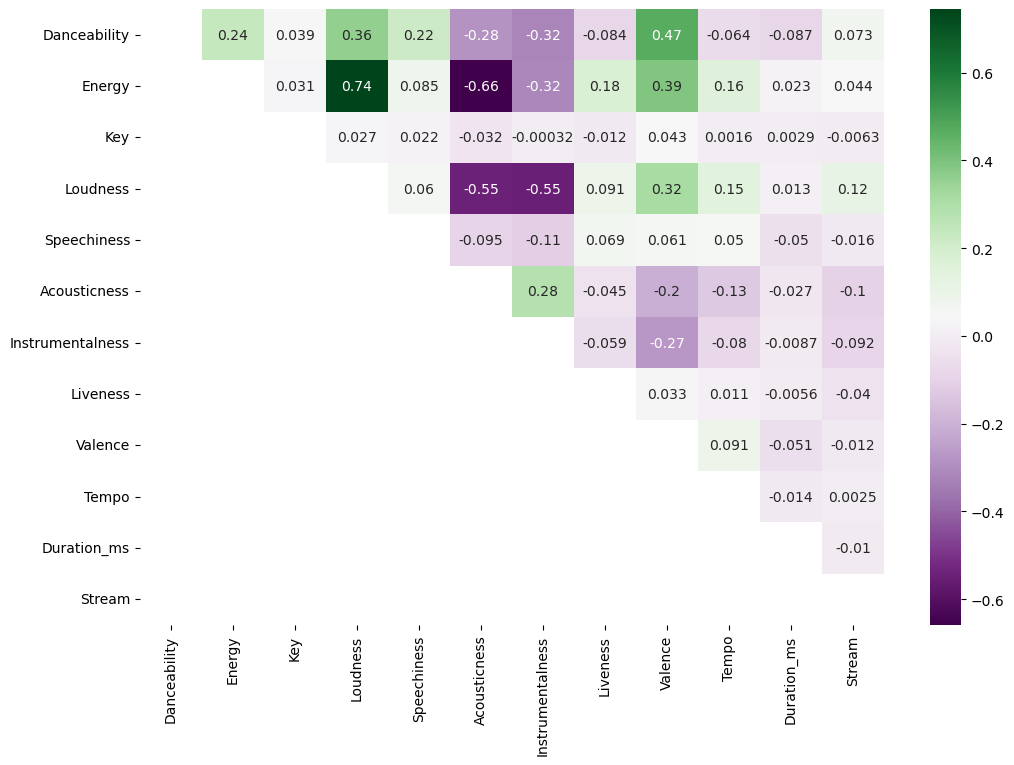

In [38]:
plt.figure(figsize = (12,8))
mask = np.tril(music_dataset.corr())
sns.heatmap(music_dataset.corr(), annot=True, cmap='PRGn', mask=mask, square=False)

0    3.0
1    3.0
2    4.0
3    3.0
4    3.0
Name: energy_category, dtype: float64


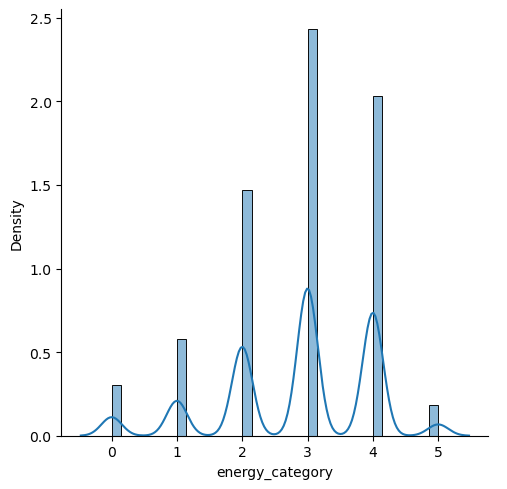

In [39]:
# Adding one dummy column to the dataframe which categorize all those energy values into six different categories.
# Now the dataframe has been properly updated
music_dataset['energy_category'] = music_dataset['Energy'] // 0.002
print(music_dataset['energy_category'].head())
sns.FacetGrid(music_dataset, height=5) \
    .map(sns.histplot, 'energy_category', kde=True, stat="density", kde_kws=dict(cut=3)) \
    .add_legend();

In [40]:
# Spliting the data into train and test. We will do a 80:20 split.
music_dataset = music_dataset.drop(columns = ['Energy', 'Stream', 'Duration_ms', 'Key', 'Speechiness'], axis = 1)
train, test = train_test_split(music_dataset, test_size=0.2, random_state=1)
X_train = train.drop('energy_category', axis = 1)
y_train = train['energy_category']
X_test = test.drop('energy_category', axis = 1)
y_test = test['energy_category']

print(X_train.head())
print(X_test.head())

       Danceability  Loudness  Acousticness  Instrumentalness  Liveness  \
17510      0.008768 -0.005716      0.004859      3.511080e-05  0.003940   
15912      0.004378 -0.008499      0.013095      0.000000e+00  0.002245   
4280       0.005234 -0.006569      0.014904      7.935042e-05  0.005730   
10216      0.006924 -0.003755      0.009683      2.478823e-07  0.009284   
11580      0.008109 -0.004779      0.005048      0.000000e+00  0.013141   

        Valence     Tempo  
17510  0.008235  0.006015  
15912  0.008501  0.005570  
4280   0.008537  0.004796  
10216  0.011386  0.009067  
11580  0.003031  0.007605  
       Danceability  Loudness  Acousticness  Instrumentalness  Liveness  \
16750      0.009316 -0.004878      0.001216      2.233047e-04  0.002711   
741        0.007604 -0.005643      0.000260      2.004827e-07  0.002783   
4838       0.005201 -0.017505      0.016334      9.234142e-06  0.003058   
8101       0.008340 -0.006150      0.000949      1.541364e-04  0.004436   
11124 

In [49]:
# Construct the KNN models with the data already in hand
neigh = KNeighborsClassifier(n_neighbors=24)
# The model is properly trained here
neigh_fit = neigh.fit(X_train, y_train)

In [50]:
# This cell predicts the Energy level in order to check the model
pred = neigh.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, pred))
print("Mean Square Error : ", mean_squared_error(y_test, pred))

Accuracy :  0.5762164846077458
Mean Square Error :  0.5163853028798411


In [53]:
# Combine the two cells above. Find the best number for k
best_iteration = 0
current_highest_accuracy = 0
for i in range(1, 51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    # The model is properly trained here
    neigh_fit = neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    if (accuracy_score(y_test, pred) > current_highest_accuracy):
        current_highest_accuracy = accuracy_score(y_test, pred)
        best_iteration = i
#     print("This is the {}th iteration.".format(i))
#     print("Accuracy : ", accuracy_score(y_test, pred))
#     print("Mean Square Error : ", mean_squared_error(y_test, pred))
print("{} as K gives the best accuracy for {}".format(best_iteration, current_highest_accuracy))

35 as K gives the best accuracy for 0.5811817279046674
